In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [2]:
Pat = [5, 4, 4, 3, 9, 4]
Jack = [4, 8, 7, 5, 1, 5]
Alex = [9, 9, 8, 10, 4, 10]
combined_score = Pat + Jack + Alex
print("Combined score is:", combined_score)

Combined score is: [5, 4, 4, 3, 9, 4, 4, 8, 7, 5, 1, 5, 9, 9, 8, 10, 4, 10]


In [3]:
archer_names = ((['Pat'] * len(Pat)) + (['Jack'] * len(Jack)) +
                (['Alex'] * len(Alex)))
my_data = pd.DataFrame({'archer_names': archer_names, 'score': combined_score})
display(my_data)

,archer_names,score
0,Pat,5
1,Pat,4
2,Pat,4
3,Pat,3
4,Pat,9
5,Pat,4
6,Jack,4
7,Jack,8
8,Jack,7
9,Jack,5


In [4]:
display(my_data.groupby('archer_names').mean())

,score
archer_names,
Alex,8.333333
Jack,5.000000
Pat,4.833333


In [5]:
linear_model = ols("score ~ archer_names", data=my_data).fit()
my_table = sm.stats.anova_lm(linear_model)
print(my_table)

                df     sum_sq    mean_sq         F    PR(>F)
archer_names   2.0  46.777778  23.388889  4.488273  0.029668
Residual      15.0  78.166667   5.211111       NaN       NaN


## Conclude:

Here, p value(0.029) is < 0.05 singnificance. Thus, We Reject Null(H0) hypothesis. At least one of the means is different whichi is comes from at least one other population mean. We can say that there is a significant difference between archers.(we can say that all archers are not perform equally)

## Who is best Archer ?

For finding which archer perform best, we have to use the tukey method. This test compares all possible pairs and identify the difference between means and which is greater than other mean.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


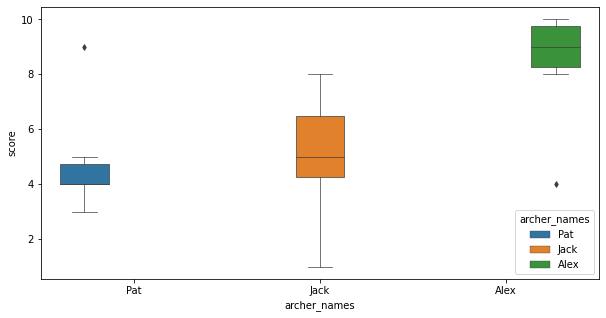

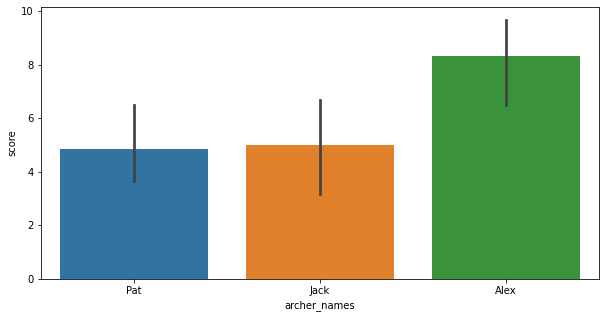

In [6]:
plt.figure(figsize=(10, 5))
print(
    sns.boxplot(x='archer_names',
                y='score',
                data=my_data,
                hue='archer_names',
                linewidth=0.7,
                fliersize=4))
plt.figure(figsize=(10, 5))
print(sns.barplot(x='archer_names', y='score', data=my_data))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


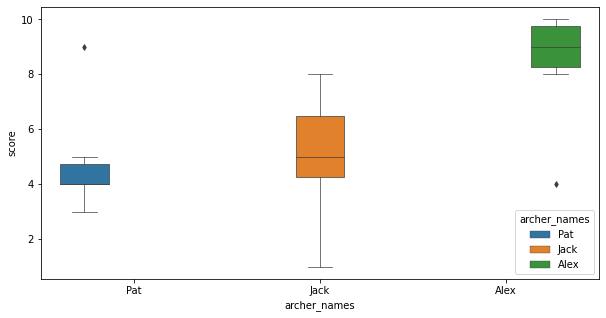

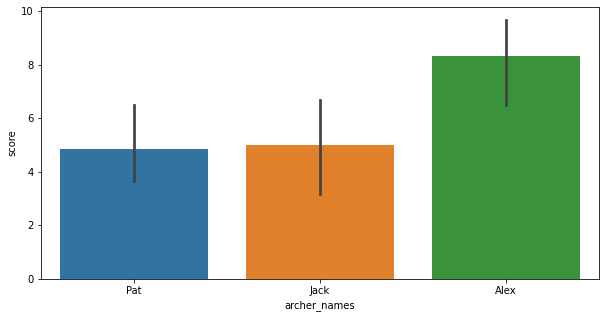

In [7]:
plt.figure(figsize=(10, 5))
print(
    sns.boxplot(x='archer_names',
                y='score',
                data=my_data,
                hue='archer_names',
                linewidth=0.7,
                fliersize=4))
plt.figure(figsize=(10, 5))
print(sns.barplot(x='archer_names', y='score', data=my_data))

## Conclude

Based on the above data, for the group (Alex & Pat) the means are unequal,we reject the null hypothesis and also the mean difference is very less compare to other groups. So,we can say that Alex is the best archer.